In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn

In [2]:
data = pd.read_csv('health_data.csv')
data.head()

,age,restbps,chol,category
0,26,109,243,0
1,27,106,156,0
2,28,107,225,0
3,27,105,277,0
4,30,96,221,0


In [3]:
X = data.to_numpy()[:, :]
Y = data.to_numpy()[:, 3]
split = 0.8 #using 70:30 split, random each time
train_samples = np.random.choice(X.shape[0], int(split*X.shape[0]))
test_samples = np.array([i for i in range(X.shape[0]) if i not in list(train_samples)])

X_train = X[[train_samples]]
Y_train = Y[[train_samples]]

X_test = X[[test_samples]]
Y_test = Y[[test_samples]]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  

In [4]:
print(X_test.shape[0])
print(X_train.shape[0])

313
560


In [5]:
no_of_classes = 2;

In [6]:
def euclidean_distance(X_1, X_2):
    distance_square = np.sum(np.square(X_1 - X_2), axis = 0, keepdims =True)
    
    return math.sqrt(distance_square)

In [7]:
# Locate the most similar k neighbors
def get_neighbors(X_train, X, k):
    distances = list()
    for X_i in X_train:
        dist = euclidean_distance(X, X_i)
        distances.append((X_i, dist))
    distances.sort(key=lambda tup: tup[1])
    k_neighbors = list()
    for i in range(k):
        k_neighbors.append(distances[i][0])
    return k_neighbors

In [8]:
def predict_classification(X_train, X, k):
    k_neighbors = get_neighbors(X_train, X, k)
    output_values = [row[-1] for row in k_neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [9]:
def predict_regression(X_train, X, k):
    k_neighbors = get_neighbors(X_train, X, k)
    output_values = [row[-1] for row in k_neighbors]
    prediction = sum(output_values) / float(len(output_values))
    return prediction

In [10]:
#computing accuracy on test data.
C = np.zeros((2,2)) #[[]]
for i in range((X_test.shape[0])):
    y_pred = predict_classification(X_train, X_test[i], 4)
    C[y_pred, Y_test[i]] += 1

In [11]:
C

array([[166.,  32.],
       [ 21.,  94.]])

In [12]:
acc = (C[0,0] + C[1,1])/np.sum(C)
print(acc)

0.8306709265175719


In [13]:
neg_predictivity = (C[0,0])/(C[0,0] + C[0,1])
neg_predictivity

0.8383838383838383

In [14]:
precision = (C[1,1])/(C[1,0] + C[1,1])
precision

0.8173913043478261

In [15]:
Recall = (C[0,0])/(C[0,0] + C[1,0])
Recall

0.8877005347593583

In [16]:
Specificity = (C[1,1])/(C[0,1] + C[1,1])
Specificity

0.746031746031746

In [20]:
from tqdm import tqdm
Precision = []
Recall = []
ACC = []
F1_score = []
kk = range(1,300)
for k in tqdm(range(1,300)):
    C = np.zeros((2,2)) #[[]]
    for i in range((X_test.shape[0])):
        y_pred = predict_classification(X_train, X_test[i], k)
        C[y_pred, Y_test[i]] += 1
    acc = (C[0,0] + C[1,1])/np.sum(C) 
    pr = C[1,1]/(C[1,1] + C[0,1])
    rec = C[1,0]/(C[1,0] + C[0,0])
    f1 = 2*(pr*rec)/(pr + rec)
    Precision.append(pr)
    Recall.append(rec)
    F1_score.append(f1)
    ACC.append(acc)
#plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC curve');

100%|██████████| 299/299 [25:19<00:00,  5.08s/it]


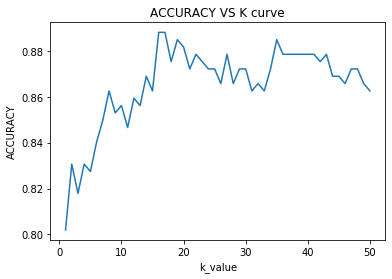

In [29]:
plt.plot(kk[:50], ACC[:50], '-')
plt.xlabel('k_value'); plt.ylabel('ACCURACY'); plt.title('ACCURACY VS K curve');

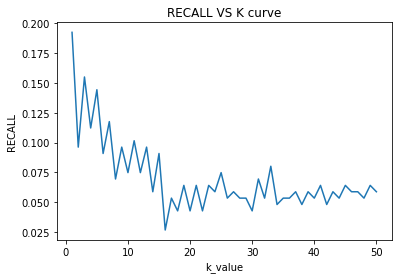

In [30]:
plt.plot(kk[:50], Recall[:50], '-')
plt.xlabel('k_value'); plt.ylabel('RECALL'); plt.title('RECALL VS K curve');

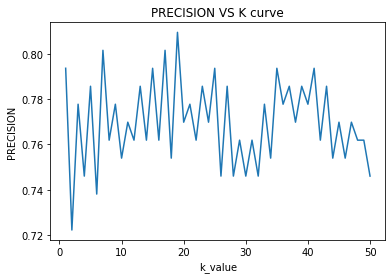

In [31]:
plt.plot(kk[:50], Precision[:50], '-')
plt.xlabel('k_value'); plt.ylabel('PRECISION'); plt.title('PRECISION VS K curve');

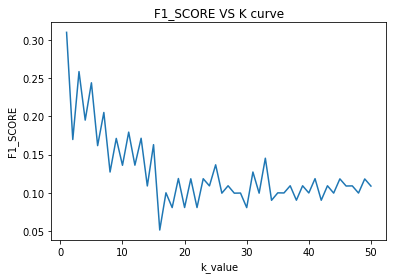

In [32]:
plt.plot(kk[:50], F1_score[:50], '-')
plt.xlabel('k_value'); plt.ylabel('F1_SCORE'); plt.title('F1_SCORE VS K curve');